## importing librarires

In [221]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

## dataset

In [222]:
X,Y=make_moons(n_samples=500,shuffle=True)

## dataset summary 

In [223]:
print("Number of training examples : "+str(X.shape[0]))
print("Number of Features : "+str(X.shape[1]))

print("..........................................")

print("Dimension of X : ",X.shape)
print("Dimension of Y: ",Y.shape)

Number of training examples : 500
Number of Features : 2
..........................................
Dimension of X :  (500, 2)
Dimension of Y:  (500,)


## data visualisation

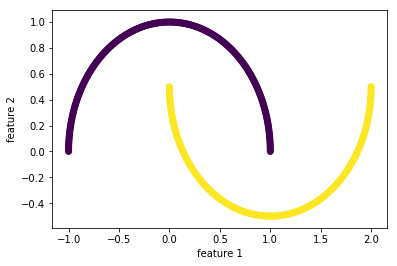

In [224]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()

In [225]:
def convertToYHotVector(Y,depth):
    m=Y.shape[0]
    Y_hot=np.zeros(shape=(m,depth))
    Y_hot[np.arange(m),Y]=1
    return Y_hot

In [226]:
Y_hot=convertToYHotVector(Y,2)

In [227]:
class NeuralNetwork:
    def __init__(self,X,layers_size):
        model={}
        m=X.shape[1]
        model["W1"]=np.random.randn(layers_size[0],2)*0.01
        model["b1"]=np.zeros(shape=(layers_size[0],1))
        for i in range(1,len(layers_size)):
            model["W"+str(i+1)]=np.random.randn(layers_size[i],layers_size[i-1])*0.01
            model["b"+str(i+1)]=np.zeros(shape=(layers_size[i],1))
            
        self.layer_size=len(layers_size)    
        self.model=model
        
    def activation(self,z,act="sigmoid"):
        if act=="relu":
            z[z<0]=0
            return z
        else:
            return 1/(1+np.exp(-z))
    def forward_propagation(self,X):
       
        model=self.model
        model['A0']=X
        for i in range(self.layer_size-1):
            Z=np.dot(model["W"+str(i+1)],model["A"+str(i)])+model['b'+str(i+1)]
            model['A'+str(i+1)]=self.activation(Z,"relu")
        i=self.layer_size 
        Z=np.dot(model["W"+str(i)],model["A"+str(i-1)])+model['b'+str(i)]
        model['A'+str(i)]= self.activation(Z)
        return model['A'+str(i)]
    
    def backward_propagation(self,X,Y):
        model=self.model
        m=Y.shape[1]
        grad={}
        AL=model['A'+str(self.layer_size)]
        grad['dA'+str(self.layer_size)]=-1*np.divide(Y,AL)+np.divide(1-Y,1-AL)
        for i in range(self.layer_size,0,-1):
            l=str(i)
            z=model['A'+str(i)]
            p=np.zeros(shape=z.shape)
            p[z>0]=1;
            grad['dZ'+l]=grad['dA'+l]*p
            grad['dW'+l]=(1/m)*np.dot(grad['dZ'+l],model['A'+str(i-1)].T)
            grad['db'+l]=np.sum(grad['dZ'+l],axis=1,keepdims=True)
            grad['dA'+str(i-1)]=np.dot(model['W'+l].T ,grad['dZ'+l])
            
        self.grad=grad;    
        
    def update_params(self,learning_rate=0.001):
        l=self.layer_size
        model=self.model
        grad=self.grad
        for i in range(1,l):
            model['W'+str(i)]=model['W'+str(i)]-learning_rate*grad['dW'+str(i)]
            model['b'+str(i)]= model['b'+str(i)]-learning_rate*grad['db'+str(i)]
    def loss(self,y,Y):
        p=np.sum(-(Y*np.log(y)+(1-Y)*np.log(1-y)),axis=1)
        p=np.squeeze(p)
        return p
    
    def train(self,X,Y,learning_rate=0.001,num_of_iterations=1000):
        losss=[]
        for i in range(num_of_iterations):
            y=self.forward_propagation(X)
            los=self.loss(y,Y)
            if(i%10==0):
                losss.append(los)
            self.backward_propagation(X,Y)
            self.update_params(learning_rate)
        return losss
    def predict(self,X):
        y=self.forward_propagation(X)
        pre=np.zeros(shape=y.shape)
        pre[y>0.5]=1
        return pre

In [228]:
X=X.reshape(2,-1)
Y=Y.reshape(1,-1)

In [229]:
layersize=[3,1]
neural=NeuralNetwork(X,layersize)

In [230]:
loss=neural.train(X,Y)

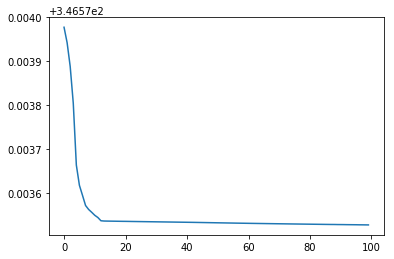

In [231]:
plt.plot(loss)